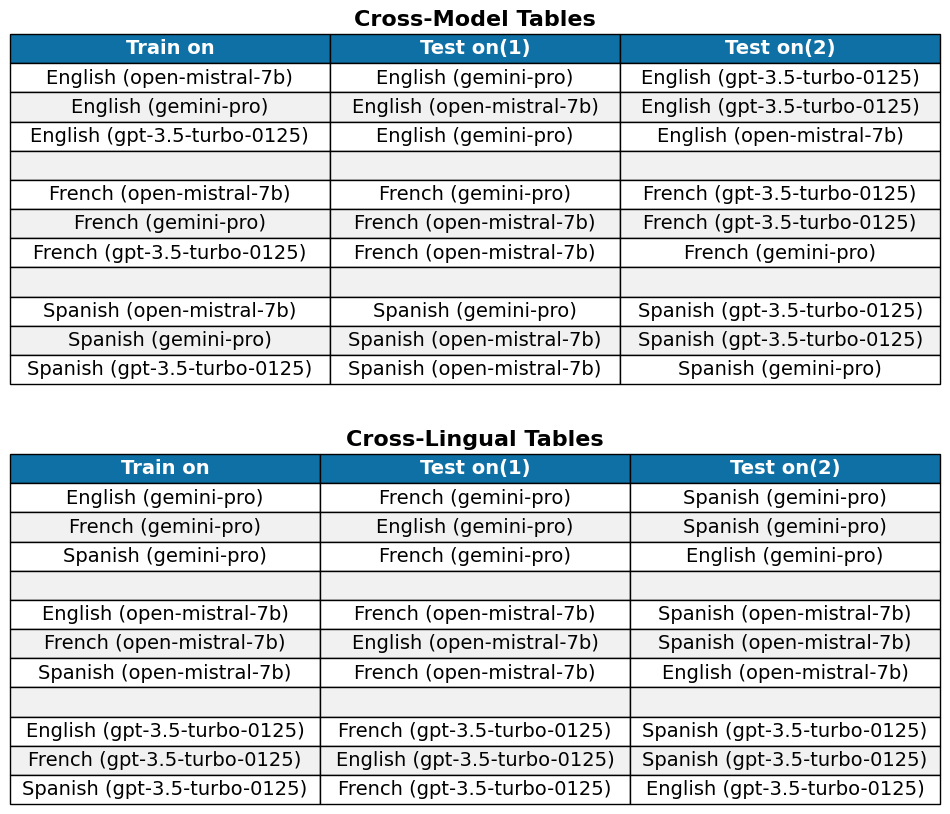

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def render_mpl_table(data, row_height=0.625, font_size=14,
                     header_color='#0e70a5', row_colors=['#f1f1f2', 'w'], edge_color='black',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):

    # Calculate the maximum string length for each column and apply padding
    padding = 5  # Define padding size
    col_widths = [max(data[col].apply(lambda x: len(str(x))).max(), len(col)) + padding for col in data.columns]
    col_widths = [x * 0.1 for x in col_widths]  # Scale factor for width

    if ax is None:
        size = (np.array([sum(col_widths), data.shape[0]+1]) * np.array([1, row_height]))
        fig, ax = plt.subplots(figsize=size)
    ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns,
                         colWidths=col_widths, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)  # Set border color for visibility
        cell.set_text_props(ha='center')  # Align all cell values to the center
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])

    return ax



# Data for Cross-Model Datasets
cross_model_data = {
    "Train on": [
        "English (open-mistral-7b)", "English (gemini-pro)", "English (gpt-3.5-turbo-0125)",
        "",
        "French (open-mistral-7b)", "French (gemini-pro)", "French (gpt-3.5-turbo-0125)",
        "",
        "Spanish (open-mistral-7b)", "Spanish (gemini-pro)", "Spanish (gpt-3.5-turbo-0125)"
    ],
    "Test on(1)": [
        "English (gemini-pro)", "English (open-mistral-7b)", "English (gemini-pro)",
        "",
        "French (gemini-pro)", "French (open-mistral-7b)", "French (open-mistral-7b)",
        "",
        "Spanish (gemini-pro)", "Spanish (open-mistral-7b)", "Spanish (open-mistral-7b)"
    ],
    "Test on(2)": [
        "English (gpt-3.5-turbo-0125)", "English (gpt-3.5-turbo-0125)", "English (open-mistral-7b)",
        "",
        "French (gpt-3.5-turbo-0125)", "French (gpt-3.5-turbo-0125)", "French (gemini-pro)",
        "",
        "Spanish (gpt-3.5-turbo-0125)", "Spanish (gpt-3.5-turbo-0125)", "Spanish (gemini-pro)"
    ]
}

# Data for Cross-Lingual Datasets
cross_lingual_data = {
    "Train on": [
        "English (gemini-pro)", "French (gemini-pro)", "Spanish (gemini-pro)",
        "",
        "English (open-mistral-7b)", "French (open-mistral-7b)", "Spanish (open-mistral-7b)",
        "",
        "English (gpt-3.5-turbo-0125)", "French (gpt-3.5-turbo-0125)", "Spanish (gpt-3.5-turbo-0125)",
    ],
    "Test on(1)": [
        "French (gemini-pro)", "English (gemini-pro)", "French (gemini-pro)",
        "",
        "French (open-mistral-7b)", "English (open-mistral-7b)", "French (open-mistral-7b)",
        "",
        "French (gpt-3.5-turbo-0125)", "English (gpt-3.5-turbo-0125)", "French (gpt-3.5-turbo-0125)",
    ],
    "Test on(2)": [
        "Spanish (gemini-pro)", "Spanish (gemini-pro)", "English (gemini-pro)",
        "",
        "Spanish (open-mistral-7b)", "Spanish (open-mistral-7b)", "English (open-mistral-7b)",
        "",
        "Spanish (gpt-3.5-turbo-0125)", "Spanish (gpt-3.5-turbo-0125)", "English (gpt-3.5-turbo-0125)",
    ]
}


# Create DataFrames from the dictionaries
cross_model_df = pd.DataFrame(cross_model_data)
cross_lingual_df = pd.DataFrame(cross_lingual_data)

# Plot both tables in one figure
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # Adjusted the size for better fit

# Render the Cross-Model table
render_mpl_table(cross_model_df, ax=axs[0])
axs[0].set_title('Cross-Model Tables', fontsize=16, weight='bold')

# Render the Cross-Lingual table
render_mpl_table(cross_lingual_df, ax=axs[1])
axs[1].set_title('Cross-Lingual Tables', fontsize=16, weight='bold')

# Save the combined figure as PNG
plt.savefig('cross_tables.png', bbox_inches='tight', dpi=300)
plt.show()
